### The purpose of this notebook is to complete a data cleaning workflow from start to finish in order to validate the core functionality our package

In [17]:
# imports

import pandas as pd
from core import *
from cpd_info import *
from mol_sim_copy import *
# import gzip
# 
# from Bio.KEGG import REST
# from Bio.KEGG import Enzyme
# import re
# from Bio.KEGG import Compound
# import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Step 1
#### Generate dataframe of all current kegg enzymes from zipped text file

In [2]:
# create_kegg_df()

enzyme_df = create_kegg_df('../datasets/KEGG_enzymes_all_data.gz', 'enzyme')
print(enzyme_df.shape)
enzyme_df.head()

(7524, 16)


,classname,cofactor,comment,dblinks,disease,effector,entry,genes,inhibitor,name,pathway,product,reaction,structures,substrate,sysname
0,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[A zinc protein. Acts on primary or secondary ...,"[(ExplorEnz - The Enzyme Database, [1.1.1.1]),...",[],[],1.1.1.1,"[(HSA, [124, 125, 126, 127, 128, 130, 131]), (...",[],"[alcohol dehydrogenase, aldehyde reductase, AD...","[(PATH, ec00010, Glycolysis / Gluconeogenesis)...","[aldehyde [CPD:C00071], NADH [CPD:C00004], H+ ...",[(1) a primary alcohol + NAD+ = an aldehyde + ...,[],"[primary alcohol [CPD:C00226], NAD+ [CPD:C0000...",[alcohol:NAD+ oxidoreductase]
1,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[A zinc protein. Some members of this group ox...,"[(ExplorEnz - The Enzyme Database, [1.1.1.2]),...",[],[],1.1.1.2,"[(HSA, [10327]), (PTR, [741418]), (PPS, [10099...",[],"[alcohol dehydrogenase (NADP+), aldehyde reduc...","[(PATH, ec00010, Glycolysis / Gluconeogenesis)...","[aldehyde [CPD:C00071], NADPH [CPD:C00005], H+...",[an alcohol + NADP+ = an aldehyde + NADPH + H+...,[],"[alcohol [CPD:C00069], NADP+ [CPD:C00006]]",[alcohol:NADP+ oxidoreductase]
2,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[The yeast enzyme acts most rapidly with NAD+;...,"[(ExplorEnz - The Enzyme Database, [1.1.1.3]),...",[],[],1.1.1.3,"[(NVE, [NEMVE_v1g225948]), (ATH, [AT1G31230, A...",[],"[homoserine dehydrogenase, HSDH, HSD]","[(PATH, ec00260, Glycine, serine and threonine...","[L-aspartate 4-semialdehyde [CPD:C00441], NADH...",[L-homoserine + NAD(P)+ = L-aspartate 4-semial...,[],"[L-homoserine [CPD:C00263], NAD+ [CPD:C00003],...",[L-homoserine:NAD(P)+ oxidoreductase]
3,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[Also converts diacetyl into acetoin with NADH...,"[(ExplorEnz - The Enzyme Database, [1.1.1.4]),...",[],[],1.1.1.4,"[(SCE, [YAL060W, YAL061W]), (KLA, [KLLA0_F0050...",[],"[(R,R)-butanediol dehydrogenase, butyleneglyco...","[(PATH, ec00650, Butanoate metabolism)]","[(R)-acetoin [CPD:C00810], NADH [CPD:C00004], ...","[(R,R)-butane-2,3-diol + NAD+ = (R)-acetoin + ...",[],"[(R,R)-butane-2,3-diol [CPD:C03044], NAD+ [CPD...","[(R,R)-butane-2,3-diol:NAD+ oxidoreductase]"
4,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[Transferred entry: acetoin dehydrogenase. Now...,[],[],[],1.1.1.5,[],[],[Transferred to 1.1.1.303 and 1.1.1.304],[],[],[],[],[],[]


## Step 2
#### Down select promiscuous enzymes from master enzyme dataframe

In [3]:
# select_promiscuous_enzymes()

prom_df = select_promiscuous_enzymes(enzyme_df)
print(prom_df.shape)
prom_df.head()

(549, 4)


,entry,reaction,product,substrate
0,1.1.1.1,[(1) a primary alcohol + NAD+ = an aldehyde + ...,"[aldehyde [CPD:C00071], NADH [CPD:C00004], H+ ...","[primary alcohol [CPD:C00226], NAD+ [CPD:C0000..."
37,1.1.1.38,[(1) (S)-malate + NAD+ = pyruvate + CO2 + NADH...,"[pyruvate [CPD:C00022], CO2 [CPD:C00011], NADH...","[(S)-malate [CPD:C00149], NAD+ [CPD:C00003], o..."
39,1.1.1.40,[(1) (S)-malate + NADP+ = pyruvate + CO2 + NAD...,"[pyruvate [CPD:C00022], CO2 [CPD:C00011], NADP...","[(S)-malate [CPD:C00149], NADP+ [CPD:C00006], ..."
41,1.1.1.42,[isocitrate + NADP+ = 2-oxoglutarate + CO2 + N...,"[2-oxoglutarate [CPD:C00026], CO2 [CPD:C00011]...","[isocitrate [CPD:C00311], NADP+ [CPD:C00006], ..."
84,1.1.1.85,"[(2R,3S)-3-isopropylmalate + NAD+ = 4-methyl-2...","[4-methyl-2-oxopentanoate [CPD:C00233], CO2 [C...","[(2R,3S)-3-isopropylmalate [CPD:C04411], NAD+ ..."


## Step 3
#### Combine substrates and products to account for reversible reactions

In [4]:
# combine_substrates_products()
    
combo_df = combine_substrates_products(prom_df)
print(combo_df.shape)
combo_df.head()

(549, 2)


,entry,product
0,1.1.1.1,"[aldehyde [CPD:C00071], NADH [CPD:C00004], H+ ..."
1,1.1.1.38,"[pyruvate [CPD:C00022], CO2 [CPD:C00011], NADH..."
2,1.1.1.40,"[pyruvate [CPD:C00022], CO2 [CPD:C00011], NADP..."
3,1.1.1.42,"[2-oxoglutarate [CPD:C00026], CO2 [CPD:C00011]..."
4,1.1.1.85,"[4-methyl-2-oxopentanoate [CPD:C00233], CO2 [C..."


## Step 4

#### Expand dataframe so that each row is a unique enzyme-product pair
There are multiple compounds in the 'product' field of the dataframe. This function parses each of those, and for each provides a new enzyme-product pair.

In [5]:
# explode_dataframe()

exploded_df = explode_dataframe(combo_df, parse_compound_ids, 'product', ['entry'])
print(exploded_df.shape)
exploded_df.head()

(3697, 2)


,entry,product
0,1.1.1.1,C00071
1,1.1.1.1,C00004
2,1.1.1.1,C00080
3,1.1.1.1,C01450
4,1.1.1.1,C00226


## Step 5
#### Remove cofactors from dataframe
We have curated a list of 37 common cofactors and reactant molecules that participate in reactions, but are not products that we care to train our model on. These steps removes cofactor data from our master dataset.

In [6]:
# remove_cofactors()

cofactors_df = pd.read_csv('../datasets/cofactor_list.csv')
clean_df = remove_cofactors(exploded_df, 'product', cofactors_df, 'CPD')
print(clean_df.shape)
clean_df.head()

(2144, 2)


,entry,product
0,1.1.1.1,C00071
3,1.1.1.1,C01450
4,1.1.1.1,C00226
6,1.1.1.1,C01612
7,1.1.1.38,C00022


## Step 6
#### Curate negative dataset
So far our curated dataset includes only examples of enzyme-product pairs that are known to react. In order to train our model, we need to include negative examples of enzyme-product pairs not expected to react. This function artifically pairs enzymes and products that are not known to react, and selects a subsample of these negative pairs to include in the master dataset

In [7]:
# create_negative_matches() - good to go

pos_df, neg_df = create_negative_matches(clean_df, 'entry', 'product')
neg_df = neg_df.sample(frac=0.01)
# combo_df = pd.concat((pos_df, neg_df), axis=0)
# print(combo_df.shape)
# combo_df.head()

In [8]:
# positive data

print(pos_df.shape)
pos_df.head()

(2144, 3)


,enzyme,product,reacts
0,1.14.19.57,C01324,1.0
1,2.3.1.230,C21490,1.0
2,2.3.1.230,C21453,1.0
3,2.3.1.230,C01944,1.0
4,2.3.1.230,C20643,1.0


In [9]:
# negative data

print(neg_df.shape)
neg_df.head()

(7111, 3)


,enzyme,product,reacts
73618,3.3.2.2,C01263,0.0
390779,1.14.19.38,C20307,0.0
649076,2.8.1.2,C16848,0.0
233017,1.14.13.187,C19798,0.0
488990,1.16.3.2,C20145,0.0


## Step 7
#### Get SMILES strings for each product from the PubChem database
The RDKit chemistry package requires SMILES strings as an input. The Kegg database does not store SMILES strings for compounds. This step joins a previously curated dataset of SMILES strings into our master dataset

In [10]:
# read in smiles data

smiles_df = pd.read_csv('../datasets/df_cleaned_kegg_with_smiles.csv')
smiles_df = smiles_df.drop_duplicates(subset='SMILES')
print(smiles_df.shape)
smiles_df.head()

(1151, 6)


,Unnamed: 0,entry,KEGG,PubChem,CID,SMILES
0,0,1.1.1.1,C00071,3371,none,none
4,5,1.1.1.110,C03964,6685,440177,C1=CC(=CC=C1C[C@H](C(=O)O)O)O
5,7,1.1.1.110,C00331,3625,803,C1=CC=C2C(=C1)C(=CN2)CC(=O)C(=O)O
6,8,1.1.1.110,C01179,4406,979,C1=CC(=CC=C1CC(=O)C(=O)O)O
7,11,1.1.1.110,C05607,7930,643327,C1=CC=C(C=C1)C[C@H](C(=O)O)O


In [11]:
# add SMILES strings to positive data

pos_df = pd.merge(pos_df, smiles_df, how='inner', left_on='product', right_on='KEGG')
pos_df = pos_df.drop(columns=['Unnamed: 0', 'KEGG', 'CID', 'entry'])
pos_df = pos_df[pos_df['SMILES'] != 'none']
# master_df = master_df.rename(columns={'entry_x': 'entry', 'product': 'kegg_compound', 
#                                       'PubChem': 'pubchem_compound'})
pos_df = pos_df.reset_index(drop=True)
print(pos_df.shape)
pos_df.head()

(1707, 5)


,enzyme,product,reacts,PubChem,SMILES
0,1.14.19.57,C01324,1.0,4536,[Br-]
1,1.14.19.55,C01324,1.0,4536,[Br-]
2,2.3.1.230,C21490,1.0,333497473,CCCCCCCC(=O)CC(=O)C1=CC=CC=C1N
3,2.3.1.230,C21453,1.0,329728076,C1=CC=C(C(=C1)C(=O)CC(=O)O)N
4,2.3.1.230,C01944,1.0,5048,CCCCCCCC(=O)SCCNC(=O)CCNC(=O)[C@@H](C(C)(C)COP...


In [12]:
# add SMILES strings to negative data

neg_df = pd.merge(neg_df, smiles_df, how='inner', left_on='product', right_on='KEGG')
neg_df = neg_df.drop(columns=['Unnamed: 0', 'KEGG', 'CID', 'entry'])
neg_df = neg_df[neg_df['SMILES'] != 'none']
# master_df = master_df.rename(columns={'entry_x': 'entry', 'product': 'kegg_compound', 
#                                       'PubChem': 'pubchem_compound'})
neg_df = neg_df.reset_index(drop=True)
print(neg_df.shape)
neg_df.head()

(5973, 5)


,enzyme,product,reacts,PubChem,SMILES
0,3.3.2.2,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...
1,1.13.11.84,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...
2,1.14.15.21,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...
3,2.1.1.349,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...
4,4.1.3.41,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...


## Step 10

#### Pre-process negative and positive datasets to remove rows with only 1 enzyme

In [13]:
# remove_single_cpd_rows()

pos_master_df = remove_single_cpd_rows(pos_df, 'enzyme', 'SMILES')
pos_master_df = pos_master_df.reset_index(drop=True)
print(pos_master_df.shape)
pos_master_df.head()

(1660, 5)


,entry,product,reacts,PubChem,SMILES
0,1.14.19.55,C01324,1.0,4536,[Br-]
1,2.3.1.230,C21490,1.0,333497473,CCCCCCCC(=O)CC(=O)C1=CC=CC=C1N
2,2.3.1.230,C21453,1.0,329728076,C1=CC=C(C(=C1)C(=O)CC(=O)O)N
3,2.3.1.230,C01944,1.0,5048,CCCCCCCC(=O)SCCNC(=O)CCNC(=O)[C@@H](C(C)(C)COP...
4,2.3.1.230,C20643,1.0,172232367,CCCCCCCC1=CC(=O)C2=CC=CC=C2N1


In [14]:
# negative and positive data must be processed separately

neg_master_df = remove_single_cpd_rows(neg_df, 'enzyme', 'SMILES')
neg_master_df = neg_master_df.reset_index(drop=True)
print(neg_master_df.shape)
neg_master_df.head()

(5972, 5)


,entry,product,reacts,PubChem,SMILES
0,3.3.2.2,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...
1,1.13.11.84,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...
2,1.14.15.21,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...
3,2.1.1.349,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...
4,4.1.3.41,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...


## Step 11
#### Calculate molecular distances between products of the same enzyme
Positive and negative data must be calculated separately

In [15]:
# calculate_dist()

pos_dist_df = calculate_dist(pos_master_df)
print(pos_dist_df.shape)
pos_dist_df.head()

(1660, 8)


,entry,product,reacts,PubChem,SMILES,Mol,Fingerprint,dist
0,1.14.19.55,C01324,1.0,4536,[Br-],<rdkit.Chem.rdchem.Mol object at 0x1a7c36a5d0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.244946
1,2.3.1.230,C21490,1.0,333497473,CCCCCCCC(=O)CC(=O)C1=CC=CC=C1N,<rdkit.Chem.rdchem.Mol object at 0x1a7c34b0d0>,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.449187
2,2.3.1.230,C21453,1.0,329728076,C1=CC=C(C(=C1)C(=O)CC(=O)O)N,<rdkit.Chem.rdchem.Mol object at 0x1a7c36a6c0>,"[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, ...",0.449187
3,2.3.1.230,C01944,1.0,5048,CCCCCCCC(=O)SCCNC(=O)CCNC(=O)[C@@H](C(C)(C)COP...,<rdkit.Chem.rdchem.Mol object at 0x1a7c34bb70>,"[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.449187
4,2.3.1.230,C20643,1.0,172232367,CCCCCCCC1=CC(=O)C2=CC=CC=C2N1,<rdkit.Chem.rdchem.Mol object at 0x1a7c36a580>,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.449187


In [16]:
neg_dist_df = calculate_dist(neg_master_df)
print(neg_dist_df.shape)
neg_dist_df.head()

(5972, 8)


,entry,product,reacts,PubChem,SMILES,Mol,Fingerprint,dist
0,3.3.2.2,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...,<rdkit.Chem.rdchem.Mol object at 0x1a7c355940>,"[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...",0.381333
1,1.13.11.84,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...,<rdkit.Chem.rdchem.Mol object at 0x10ef6bd50>,"[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...",0.344025
2,1.14.15.21,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...,<rdkit.Chem.rdchem.Mol object at 0x1a7c355c60>,"[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...",0.320014
3,2.1.1.349,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...,<rdkit.Chem.rdchem.Mol object at 0x1a7c3550d0>,"[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...",0.364299
4,4.1.3.41,C01263,0.0,4482,C1[C@@]2([C@H](C3=C(O1)C=C(C=C3)O)OC4=C2C=CC(=...,<rdkit.Chem.rdchem.Mol object at 0x1a7bebdd50>,"[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...",0.351810


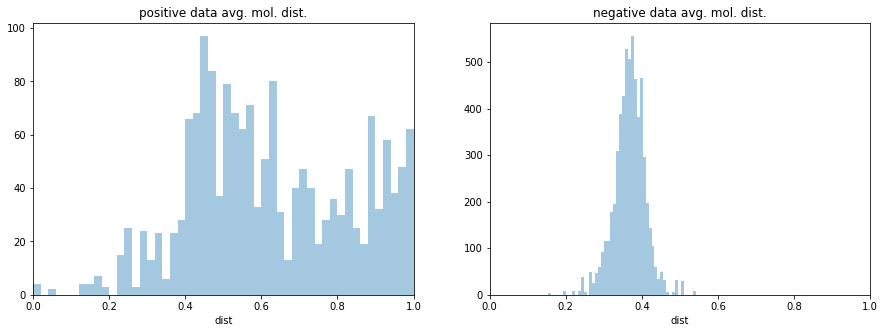

In [27]:
# look at distributions of distances for positive and negative data

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

pos = sns.distplot(pos_dist_df['dist'], bins=50, kde=False, ax=axes[0])
axes[0].set_title('positive data avg. mol. dist.')

neg = sns.distplot(neg_dist_df['dist'], bins=50, kde=False, ax=axes[1])
axes[1].set_title('negative data avg. mol. dist.')

for axis in axes:
    axis.set_xlim([0.0, 1.0])

In [ ]:
# concatenate negative & positive data and send to logistic regression model

master_df = pd.concat((pos_df, neg_df), axis=0)

In [ ]:
calculate_dist()

## Step 8
#### Get dummy variables to represent enzyme class

In [ ]:
# binarize_enzyme_class()

master_df = binarize_enzyme_class(master_df, 'enzyme')
print(master_df.shape)
master_df.head()

## Step 9
#### Add in compound features with RDKit
This step uses the RDKit packages to generate descriptive features of the compounds

In [ ]:
master_df = create_cpd_info(master_df)
print(master_df.shape)
master_df.head()